<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>Multiple Linear Regression</center></h1>

<h4>About this Notebook</h4>
En esta lección, aprenderemos a usar scikit-learn para implementar la regresión lineal múltiple. Descargamos un conjunto de datos relacionados con el consumo de combustible y la emisión de dióxido de carbono de los automóviles. Luego, dividimos nuestros datos en conjuntos de entrenamiento y pruebas, creamos un modelo usando el conjunto de entrenamiento, evaluamos su modelo usando el conjunto de pruebas y finalmente usamos el modelo para predecir el valor desconocido.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data in</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>

### Importando paquetes necesarios

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
Para descargar los datos, utilizaremos !wget para descargarlos desde IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2021-03-14 09:39:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2021-03-14 09:39:50 (1.81 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



__Did you know?__ Cuando se trata de aprendizaje automático, es probable que trabaje con conjuntos de datos de gran tamaño. Como empresa, ¿dónde puede alojar sus datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Regístrese ahora gratis] (http://cocl.us/ML0101EN-IBM-Offer-CC)


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
Hemos descargado un conjunto de datos de consumo de combustible, **`FuelConsumption.csv`**, que contiene las clasificaciones de consumo de combustible específicas de cada modelo y las emisiones estimadas de dióxido de carbono de los vehículos ligeros nuevos para su venta al por menor en Canadá. [Fuente del conjunto de datos] (http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# Dale un vistazo al conjunto de datos
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Seleccionemos algunas características que queremos usar para la regresión.

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Tracemos los valores de las emisiones con respecto al tamaño del motor:

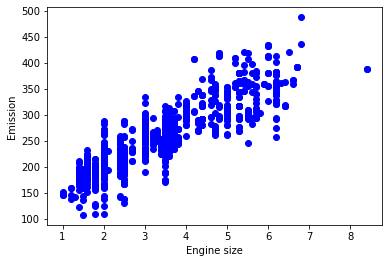

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
La división tren/prueba implica dividir el conjunto de datos en conjuntos de formación y de pruebas respectivamente, que son mutuamente excluyentes. Después de lo cual, usted entrena con el equipo de entrenamiento y prueba con el equipo de prueba. 
Esto proporcionará una evaluación más precisa de la precisión fuera de la muestra, ya que el conjunto de datos de la prueba no forma parte del conjunto de datos que se ha utilizado para entrenar los datos. Es más realista para los problemas del mundo real.

Esto significa que conocemos el resultado de cada punto de datos de este conjunto de datos, lo que hace que sea genial probarlo. Y puesto que estos datos no han sido usados para entrenar al modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Así que, en esencia, es realmente una prueba fuera de la muestra.



In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution

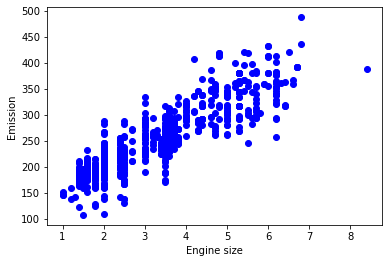

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


En realidad, existen múltiples variables que predicen la emisión de CO2. Cuando hay más de una variable independiente presente, el proceso se denomina regresión lineal múltiple. Por ejemplo, predecir las emisiones de co2 utilizando FUELCONSUMPTION_COMB, EngineSize (tamaño del motor) y Cilindros de automóviles. Lo bueno aquí es que la regresión lineal múltiple es la extensión del modelo de regresión lineal simple.

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.99637824  7.65080454  9.6856638 ]]


Como se mencionó anteriormente, __Coefficient__ e __Intercept__ , son los parámetros de la línea curva de ajuste. 
Dado que se trata de una regresión lineal múltiple, con 3 parámetros, y sabiendo que los parámetros son la intercepción y los coeficientes del hiperplano, sklearn puede estimarlos a partir de nuestros datos. Scikit-learn utiliza el método de los mínimos cuadrados ordinarios para resolver este problema.

#### Ordinary Least Squares (OLS)
OLS es un método para estimar los parámetros desconocidos en un modelo de regresión lineal. OLS elige los parámetros de una función lineal de un conjunto de variables explicativas minimizando la suma de los cuadrados de las diferencias entre la variable objetivo dependiente y las previstas por la función lineal. En otras palabras, intenta minimizar la suma de errores cuadrados (SSE) o el error cuadrado medio (MSE) entre la variable objetivo (y) y nuestro resultado previsto ($hathat{y}$) en todas las muestras del conjunto de datos.

OLS puede encontrar los mejores parámetros usando los siguientes métodos:
    - Resolución analítica de los parámetros del modelo mediante ecuaciones de forma cerrada
    - Utilizando un algoritmo de optimización (Descenso de Gradiente, Descenso de Gradiente Estocástico, Método de Newton, etc.)

<h2 id="prediction">Prediction</h2>

In [25]:
y_ht= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_ht - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

ValueError: shapes (233,3) and (4,1) not aligned: 3 (dim 1) != 4 (dim 0)

__explained variance regression score:__  
Si $\hat{y}$ es la salida teórica estimada, y la salida teórica correspondiente (correcta), y Var es Varianza, el cuadrado de la desviación estándar, entonces la varianza explicada se estima de la siguiente manera:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
La mejor puntuación posible es 1.0, los valores más bajos son peores.

<h2 id="practice">Practice</h2>
Intente usar una regresión lineal múltiple con el mismo conjunto de datos pero esta vez use __FUEL CONSUMPTION (CONSUMO DE COMBUSTIBLE) en CITY__ y 
FUEL CONSUMPTION en HWY__ en lugar de FUELCONSUMPTION_COMB. ¿Resulta en una mejor precisión?

In [22]:
# write your code here
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

y_PR= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_PR - y) ** 2))


print('Variance score: %.2f' % regr.score(x, y))


Coefficients:  [[11.11016714  7.31431485  6.11835667  3.31149129]]
Residual sum of squares: 567.02
Variance score: 0.86


Haga doble clic __aquí__ para obtener la solución.

<!-- Su respuesta está abajo:

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))


-->

In [20]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[11.11016714  7.31431485  6.11835667  3.31149129]]
Residual sum of squares: 567.02
Variance score: 0.86


<h2>¿Quieres saber más?</h2>

IBM SPSS Modeler es una plataforma analítica completa que tiene muchos algoritmos de aprendizaje de máquina. Ha sido diseñado para aportar inteligencia predictiva a las decisiones tomadas por individuos, por grupos, por sistemas, por su empresa en su conjunto. Una prueba gratuita está disponible a través de este curso, disponible aquí: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Además, puede utilizar Watson Studio para ejecutar estos portátiles más rápidamente con conjuntos de datos más grandes. Watson Studio es la solución de nube líder de IBM para científicos de datos, construida por científicos de datos. Con los portátiles Jupyter, RStudio, Apache Spark y las bibliotecas más populares preempaquetadas en la nube, Watson Studio permite a los científicos de datos colaborar en sus proyectos sin tener que instalar nada. Únase a la creciente comunidad de usuarios de Watson Studio hoy mismo con una cuenta gratuita en <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Gracias por completar esta lección!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD es un Científico de Datos en IBM con un historial de desarrollo de aplicaciones a nivel empresarial que aumenta sustancialmente la capacidad de los clientes para convertir datos en conocimiento práctico. Es investigador en el campo de la minería de datos y experto en el desarrollo de métodos analíticos avanzados como el aprendizaje automático y la modelado estadístico de grandes conjuntos de datos.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. Este cuaderno y su código fuente se publican bajo los términos de <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>